**Index**

[Preliminary Data Stuff](#data_stuff) <br>
[Data Plan](#assumptions) <br>


In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
%matplotlib inline
from datetime import datetime 

In [138]:
## Team Data
team_data = pd.read_csv('raw_data/MDataFiles_Stage1/MTeams.csv')
team_data.sample(10)


,TeamID,TeamName,FirstD1Season,LastD1Season
352,1453,WI Green Bay,1985,2020
266,1367,SC Upstate,2008,2020
172,1273,Mercer,1985,2020
310,1411,TX Southern,1985,2020
213,1314,North Carolina,1985,2020
182,1283,Missouri St,1985,2020
212,1313,Norfolk St,1998,2020
180,1281,Missouri,1985,2020
58,1159,Colgate,1985,2020
36,1137,Bucknell,1985,2020


In [139]:
## Massey Data - his file lists out rankings (e.g. #1, #2, #3, ..., #N) 
# of teams going back to the 2002-2003 season, 
# under a large number of different ranking system methodologies. 
massey_data = pd.read_csv('raw_data/MDataFiles_Stage1/MMasseyOrdinals.csv')
massey_data.sample(10)

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
2826490,2016,121,CPA,1324,96
1388657,2011,93,RT,1130,55
3737842,2019,114,INC,1223,264
2101843,2014,65,7OT,1317,185
1843455,2013,71,STH,1347,285
2666070,2016,58,WOL,1379,302
3158734,2017,128,EBP,1361,80
1926420,2013,105,WIL,1167,261
1570302,2012,71,RT,1337,237
1649433,2012,106,HAT,1140,42


In [140]:
## Seed Data - This file identifies the seeds for all teams in each NCAA® tournament, 
# for all seasons of historical data. Thus, there are between 64-68 rows for each year,
# depending on whether there were any play-in games and how many there were.
seed_data = pd.read_csv('raw_data/MDataFiles_Stage1/MNCAATourneySeeds.csv')
seed_data.sample(10)

,Season,Seed,TeamID
1703,2011,X12,1272
1573,2009,X14,1372
1430,2007,X01,1326
766,1996,Z15,1354
780,1997,W13,1254
659,1995,X04,1428
1914,2014,Y04,1257
469,1992,X06,1207
952,1999,Z09,1307
217,1988,X10,1429


In [141]:

## number of times seeded in the last 5 years  (avg)
## last year seed
## max seed last 5 years

seed_data['Seedless'] = seed_data['Seed'].apply(lambda x: x[1:3])
seed_data['Seedless'] = pd.to_numeric(seed_data['Seedless'])
seed_data['Last Seed'] =  seed_data.groupby('TeamID')['Seedless'].shift(1)
seed_data['Max Seed 5Y'] = seed_data.groupby('TeamID')['Seedless'].transform(lambda x: x.rolling(5, min_periods=1).max())
seed_data['Avg Seed 5Y'] = seed_data.groupby('TeamID')['Seedless'].transform(lambda x: x.rolling(5, min_periods=1).mean())
seed_data['Avg Seed 5Y Weighted'] = seed_data.groupby('TeamID')['Seedless'].transform(lambda x: x.rolling(5, min_periods=1, win_type='flattop').mean())
seed_data.drop(['Seedless'], axis=1, inplace=True)

seed_data.loc[seed_data['TeamID'] == 1437]


,Season,Seed,TeamID,Last Seed,Max Seed 5Y,Avg Seed 5Y,Avg Seed 5Y Weighted
55,1985,Z08,1437,NaN,8,8.0,8.000000
105,1986,Y10,1437,8.0,10,9.0,8.015267
229,1988,Y06,1437,10.0,10,8.0,7.885027
363,1990,Y12,1437,6.0,12,9.0,10.368023
392,1991,W09,1437,12.0,12,9.0,5.382395
642,1995,W03,1437,9.0,12,8.0,12.558921
722,1996,X03,1437,3.0,12,6.6,9.188831
771,1997,W04,1437,3.0,12,6.2,2.626124
919,1999,X08,1437,4.0,9,5.4,2.933270
1336,2005,Z05,1437,8.0,8,4.6,3.815428


In [142]:
# this data shows the probability of wins for a particular seed matchup
seed_matchup_probability = pd.read_csv('cleaned_data/seed_matchup_probabilities.csv')
seed_matchup_probability.sample(10)

,Unnamed: 0,Season,Team_ID_H,Team_ID_L,Seed_Matchup_Probability
1065,1065,2001,1344,1336,0.607143
1404,1404,2007,1435,1203,0.371429
1836,1836,2013,1458,1279,0.357143
2010,2010,2016,1403,1139,0.514286
529,529,1993,1329,1266,0.357143
1722,1722,2012,1458,1393,0.730159
1136,1136,2003,1328,1143,0.200000
1401,1401,2007,1425,1400,0.554054
626,626,1994,1453,1393,0.684211
964,964,2000,1397,1163,0.445946



One row per team per season
| Season | Team_ID |

- Seed Data
- Rank data
- Regular season data 
- Coach
- Previous Tournament Data
    - Wins previous tournaments, placed last tournament,\

Validation Table
One row per matchup per season - NCAA
| Season | Team_ID_Low | Team_ID_High | Outcome (1,0)|

<a id='assumptions'></a>
#### Data Plan


In [143]:
### Prediction Data set 
## T1 T2 input_variables 
## T1 T2 output_probability
## 1 - if the team with the lower team # wins
## 0 - if the team with the lower team # loses
## output_probability = prob(1) = probability that the team with lower team number wins
### Lowerteamid_Higherteamid_yr: P(Lowerteamid wins)

In [144]:
# Preliminary model
validation_data = pd.read_csv('cleaned_data/validation_dataset.csv')
validation_data.head()

,Unnamed: 0,Season,Team_ID_L,Team_ID_H,Outcome
0,0,1985,1116,1234,1
1,1,1985,1120,1345,1
2,2,1985,1207,1250,1
3,3,1985,1229,1425,1
4,4,1985,1242,1325,1


In [145]:
temp_data = pd.merge(
    seed_data, validation_data, 
    left_on=['Season', 'TeamID'], 
    right_on=['Season', 'Team_ID_L'], 
    how='inner')

temp_data.sample(10)

,Season,Seed,TeamID,Last Seed,Max Seed 5Y,Avg Seed 5Y,Avg Seed 5Y Weighted,Unnamed: 0,Team_ID_L,Team_ID_H,Outcome
11,1985,W06,1208,NaN,6,6.000000,6.000000,19,1208,1455,1
838,1998,X01,1112,4.0,5,3.000000,2.816848,876,1112,1428,0
2035,2016,Z02,1328,3.0,10,4.400000,4.818268,2036,1328,1401,1
399,1991,X04,1104,7.0,7,4.800000,6.185991,394,1104,1293,1
1961,2015,Y08,1153,5.0,10,7.000000,10.556555,1953,1153,1246,0
1743,2012,X12a,1143,8.0,12,8.400000,6.935637,1717,1143,1378,0
591,1994,X04,1242,2.0,4,2.400000,0.813535,618,1242,1345,0
2015,2016,X15,1292,11.0,15,13.200000,13.182679,2031,1292,1393,0
863,1998,Y14,1158,12.0,14,12.666667,11.999109,846,1158,1390,0
2072,2017,X01,1211,11.0,11,4.600000,1.078088,2116,1211,1314,0


In [146]:
prediction_data = pd.merge(
    seed_data, 
    temp_data, 
    left_on=['Season', 'TeamID'], 
    right_on=['Season', 'Team_ID_H'], 
    how='inner', suffixes=['_H', '_L'])

prediction_data.drop(['TeamID_H', 'TeamID_L', 'Unnamed: 0'], axis=1, inplace=True)
prediction_data.sample(10)

,Season,Seed_H,Last Seed_H,Max Seed 5Y_H,Avg Seed 5Y_H,Avg Seed 5Y Weighted_H,Seed_L,Last Seed_L,Max Seed 5Y_L,Avg Seed 5Y_L,Avg Seed 5Y Weighted_L,Team_ID_L,Team_ID_H,Outcome
1817,2013,Y02,2.0,2,1.6,0.937530,Y07,8.0,10,8.200000,10.126361,1166,1181,0
1413,2007,X03,12.0,12,9.0,12.004011,X14,15.0,15,12.800000,13.000473,1335,1401,0
964,2000,X04,4.0,10,6.5,8.124882,X05,1.0,5,2.200000,2.121628,1163,1397,0
99,1986,Y04,3.0,4,3.5,3.007634,Y13,NaN,13,13.000000,13.000000,1193,1228,0
758,1997,W01,6.0,6,2.2,1.816375,W09,NaN,9,9.000000,9.000000,1160,1314,0
472,1992,Y01,3.0,6,3.4,1.691434,Y16,NaN,16,16.000000,16.000000,1224,1242,0
2126,2018,W03,8.0,10,7.0,10.373403,W14,14.0,14,13.200000,11.875059,1372,1403,0
1155,2003,X01,6.0,7,5.0,6.063417,X09,6.0,10,7.000000,10.739707,1345,1400,0
365,1990,Z01,4.0,4,2.8,4.185991,Z12,9.0,14,11.666667,14.290553,1123,1424,0
1810,2013,X09,9.0,12,7.0,1.499763,X08,1.0,8,2.600000,2.120681,1314,1437,1


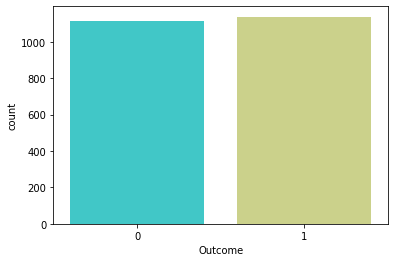

In [147]:
sns.countplot(x='Outcome',data=prediction_data,palette='rainbow')

In [148]:
prediction_data = pd.merge(
    prediction_data,
    seed_matchup_probability,
    on = ["Season", "Team_ID_H", "Team_ID_L"],
    how = 'inner'
)
prediction_data.sample(10)

,Season,Seed_H,Last Seed_H,Max Seed 5Y_H,Avg Seed 5Y_H,Avg Seed 5Y Weighted_H,Seed_L,Last Seed_L,Max Seed 5Y_L,Avg Seed 5Y_L,Avg Seed 5Y Weighted_L,Team_ID_L,Team_ID_H,Outcome,Unnamed: 0,Seed_Matchup_Probability
1565,2009,Y14,NaN,14,14.00,14.000000,Y03,1.0,4,2.400000,0.813535,1242,1295,1,1565,0.850000
1701,2011,Z02,6.0,6,4.80,4.878372,Z15,13.0,15,14.333333,15.115865,1103,1323,0,1701,0.057143
530,1993,X09,14.0,14,10.80,5.011832,X01,2.0,8,3.000000,1.631330,1231,1462,1,530,0.916667
442,1992,W02,2.0,12,5.00,8.800757,W01,2.0,3,2.000000,3.124468,1181,1246,1,442,0.538462
371,1990,Z04,4.0,5,3.75,5.246452,Z13,13.0,13,13.000000,13.000000,1225,1257,0,371,0.207143
1131,2002,Z08,4.0,8,5.80,6.183625,Z12,9.0,12,9.200000,9.060577,1281,1417,1,1131,1.000000
731,1996,Y06,9.0,9,4.60,5.000947,Y11,9.0,11,10.333333,11.115865,1130,1231,1,731,0.371429
1134,2002,Z12,9.0,12,9.20,9.060577,Z05,6.0,11,6.000000,1.199149,1274,1281,0,1134,0.642857
912,1999,X14,13.0,14,10.40,6.320398,X03,2.0,3,1.600000,0.937530,1246,1308,1,912,0.850000
767,1997,W10,10.0,11,9.00,11.371036,W06,6.0,11,6.000000,11.805490,1257,1400,1,767,0.666667


In [149]:
prediction_data.to_csv("cleaned_data/raw_training_dataset.csv")